        PC1       PC2  label
0  0.823414  2.466118      1
1 -1.734027 -0.961958      0
2 -1.240477 -1.156402      0
3 -1.837061 -0.866165      0
4 -2.863436  1.310516      0
5 -1.953911 -0.884686      0


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Text(0.5,1,'2 Component PCA')

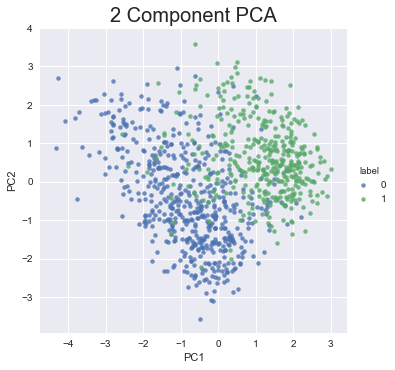

In [213]:
#Manual PCA algorithm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

DATA_SET_PATH = "election_dataset.csv"

dataset = pd.read_csv("election_dataset.csv")

#split data 
x = dataset.values[:, [0,1,2,3,4,5,6,7,8]] #feature variables
y = dataset.values[:,9]  #outcome variable    

#normalize features to scale data 
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(x)

# compute covariance matrix of features in columns from x_std
features = x_std.T  # .T : transpose of a matrix
covariance_matrix = np.cov(features)


#compute eigenvectors and eigenvalues from covariance matrix
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)


projected_X = x_std.dot(eig_vecs.T[0]) # Dot product of two arrays for PC1
projected_Y = x_std.dot(eig_vecs.T[1]) # Dot product of two arrays for PC2

result = pd.DataFrame(projected_X,columns=['PC1'])
result ['PC2'] = pd.DataFrame(projected_Y,columns=['PC2']) 
result ['label'] = y


#print first 5 rows of values that reflect 2 component data
print (result.head(6))

#plot data
sns.lmplot('PC1', 'PC2', data=result, fit_reg=False, scatter_kws={"s": 20}, hue="label") 
plt.title('2 Component PCA', size=20)








       PC 1      PC 2  vote
0 -0.823414  2.466118     1
1  1.734027 -0.961958     0
2  1.240477 -1.156402     0
3  1.837061 -0.866165     0
4  2.863436  1.310516     0
5  1.953911 -0.884686     0


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


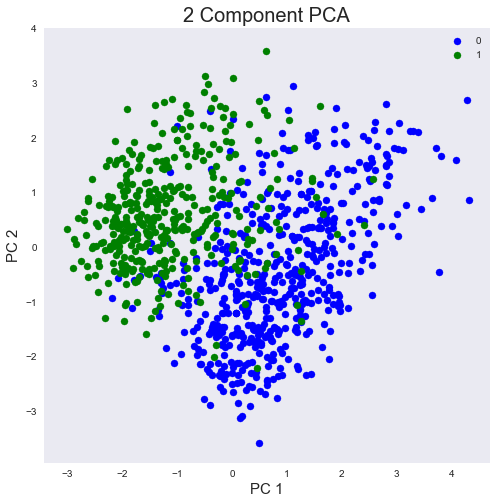

In [214]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline


# loading dataset into Pandas DataFrame, dataset does not have header
df = pd.read_csv('election_dataset2.csv',
                 names=['popul', 'TVnews','selfLR','ClinLR','DoleLR','PID','age','educ','income', 'vote'])
df.head()
#assign features variables
features = ['popul', 'TVnews','selfLR','ClinLR','DoleLR','PID','age','educ','income']
x = df.loc[:, features].values

#assign outcome variable
y = df.loc[:,'vote'].values

#normalize features to scale data 
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()

#use Scikit shortcut for PCA analysis for 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2'])

df[['vote']].head()
finalDf = pd.concat([principalDf, df[['vote']]], axis = 1)


#print first 5 rows of values that reflect 2 component data
print(finalDf.head(6))

#plot 2 component PCA data
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = [0, 1]
colors = ['b', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['vote'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1'], finalDf.loc[indicesToKeep, 'PC 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

